# This notebook was made to understanding water sample data taken from Kaggle

08/24/2021

Author: Jason Li

In [2]:
import pandas as pd
import numpy as np

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('waterPollution.csv');

In [4]:
df.head(5)

,parameterWaterBodyCategory,observedPropertyDeterminandCode,procedureAnalysedFraction,procedureAnalysedMedia,resultUom,phenomenonTimeReferenceYear,parameterSamplingPeriod,resultMeanValue,waterBodyIdentifier,Country,...,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,waste_treatment_recycling_percent
0,RW,CAS_14797-65-0,total,water,mg{NO2}/L,2009,2009-01--2009-12,0.063310,FRDR609,France,...,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
1,RW,CAS_14797-65-0,total,water,mg{NO2}/L,2009,2009-01--2009-12,0.046733,FRFR238,France,...,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
2,RW,EEA_3164-07-6,total,water,{massRatio},2009,2009-01--2009-12,132.859000,FRFR238,France,...,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
3,RW,CAS_14797-55-8,total,water,mg{NO3}/L,2009,2009-01--2009-12,11.578376,FRFR327C,France,...,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
4,RW,EEA_3151-01-7,total,water,mmol/L,2009,2009-01--2009-12,0.206800,ES014MSPFES-014-NR-038-000-02-02,Spain,...,49.0,8.0,3.0,14.0,15.0,9.0,0.0,2.0,0.0,16.84


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 29 columns):
parameterWaterBodyCategory                     20000 non-null object
observedPropertyDeterminandCode                20000 non-null object
procedureAnalysedFraction                      20000 non-null object
procedureAnalysedMedia                         20000 non-null object
resultUom                                      20000 non-null object
phenomenonTimeReferenceYear                    20000 non-null int64
parameterSamplingPeriod                        20000 non-null object
resultMeanValue                                20000 non-null float64
waterBodyIdentifier                            20000 non-null object
Country                                        20000 non-null object
PopulationDensity                              19893 non-null float64
TerraMarineProtected_2016_2018                 19893 non-null float64
TouristMean_1990_2020                          19893 non-null



It consists of 29 columns. Some columns are non-number objects. Column such as years and countries.

An approach to take is understanding where and when the data were collected before diving into the composition of the water sample.

Our Dataset's entries are not all the same for all columns. In this case, we will start with understanding how many columns in the data has nan values and make sure to remove duplicate entries.


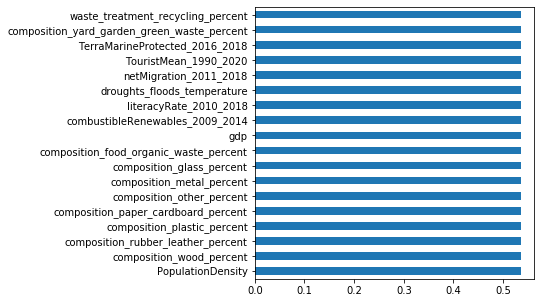

In [8]:
MissChart = df.isnull().sum()/df.shape[0] *100
MissChart[MissChart >0].sort_values(ascending=True).plot(kind='barh', figsize = (5,5))

It seems like the about amount of data missing is about 0.5 percent which means the dataset has very little missing data.

In [9]:
df = df.dropna()

In [12]:
df_nondup = df.drop_duplicates()

In [13]:
df_nondup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19814 entries, 0 to 19999
Data columns (total 29 columns):
parameterWaterBodyCategory                     19814 non-null object
observedPropertyDeterminandCode                19814 non-null object
procedureAnalysedFraction                      19814 non-null object
procedureAnalysedMedia                         19814 non-null object
resultUom                                      19814 non-null object
phenomenonTimeReferenceYear                    19814 non-null int64
parameterSamplingPeriod                        19814 non-null object
resultMeanValue                                19814 non-null float64
waterBodyIdentifier                            19814 non-null object
Country                                        19814 non-null object
PopulationDensity                              19814 non-null float64
TerraMarineProtected_2016_2018                 19814 non-null float64
TouristMean_1990_2020                          19814 non-null

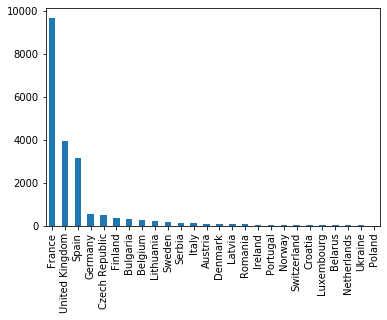

In [14]:
#df_country = df.groupby(['Country']).size().reset_index(name='Count')
df_nondup['Country'].value_counts().plot(kind='bar')
#we see the country of water sample collected is skewed towards france

We can see from this chart, most of our data is gathered from France, UK and Spain. 

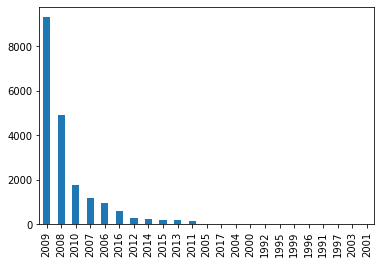

In [16]:
df_nondup.phenomenonTimeReferenceYear.value_counts().plot(kind='bar')
#we see the years of water sample collected is skewed toward 2006-2010

Most of values in the dataset comes from 2006-2010.

let's visualize the number of data points collected based on Years and Countries via bubble plot. We want to see how is our dataset distributed based on years and countries.

In [17]:
df3= df_nondup.groupby(['phenomenonTimeReferenceYear','Country']).count().reset_index()

Did a groupby method by year and countries

In [18]:
df3 = df3[['phenomenonTimeReferenceYear','Country', 'resultUom']]

In [19]:
df3 = df3.rename(columns = {"resultUom":"Count"})

In [20]:
df3.loc[df3['Country'] == "Czech Republic"]

,phenomenonTimeReferenceYear,Country,Count
30,2008,Czech Republic,66
48,2009,Czech Republic,43
69,2010,Czech Republic,14
84,2011,Czech Republic,15
92,2012,Czech Republic,49
96,2013,Czech Republic,48
98,2014,Czech Republic,69
103,2015,Czech Republic,33
107,2016,Czech Republic,142


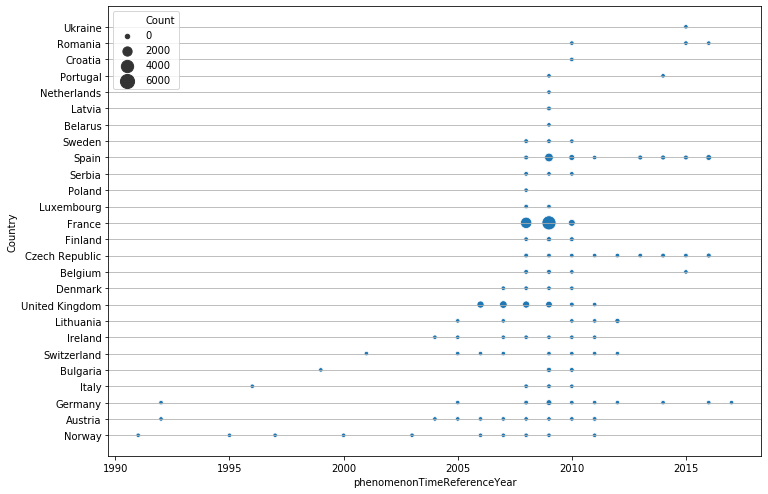

In [22]:
from matplotlib import pyplot
import seaborn

a4_dims = (11.7, 8.27)

fig, ax = pyplot.subplots(figsize=a4_dims)

sns.scatterplot(x="phenomenonTimeReferenceYear", y="Country",size="Count", data=df3,sizes=(20, 200))

plt.grid(axis = 'y')


- We can see that most of our data is gather in France from 2008- 2010. United Kingdom from 2006 - 2011. 
- Not all countries have data throughout the year of 1991 - 2017.
- The graph also shows some countries have small amount of data each year and are spread throughout the years. ex: Czech republic.



## Next step

Currently have no plans on using this dataset for any machine learning algorithm/prediction. 

This dataset does not encompress lot of the data before 2005 and after 2011.

Thinking in terms of question to understand the dataset more:
- How should we modify the dataset to do a better comparsion between countries and years?
- How does the water sample data changes throughout years for countries with suffice data?
- Are there any correlation/interesting finding that would impact water sample data such as countries gdp, literacy rate, Pouplation Density?